In [9]:
from examples_helper_functions import *

# Sparsifier class

All of the classes in sparsekmeans are subclasses of the base class `Sparsifier`, which contains all of the methods necessary for data transformation and dimensionality reduction. The main purpose of the `Sparsifier` class is to apply the Random Orthogonal System (ROS) preconditioning and subsampling to the dense data. 

## Basic Usage

In [25]:
# generate some random data
number_of_datapoints = 1000
latent_dimension = 800
X = np.random.rand(number_of_datapoints, latent_dimension)

# sparsify it
from sparseklearn import Sparsifier
spf = Sparsifier(gamma=0.05)
spf.fit_sparsifier(X)

print("Data reduced from {} to {} dimensions.".format(spf.P, spf.M))

Data reduced from 800 to 40 dimensions.


We'll see how this works on an example image. Here's the original image:

## Conceptual Discussion

We'll look at what the `Sparsifier` does to an example image. Here's a face:

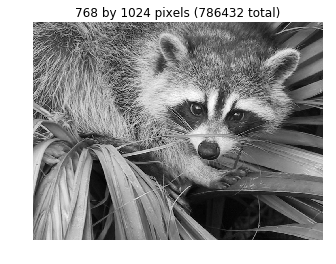

In [26]:
plt.imshow(face,cmap = plt.cm.gray)
plt.title('{} by {} pixels ({} total)'.format(fR,fC,fR*fC))
plt.axis('off')
plt.show()

The `Sparsifier` class works on 2D arrays of data, in which each row is a datapoint. The image above then must be reshaped to a 1 by 786432. In practice, of course, we'd have many more datapoints. First we'll just randomly subsample pixels, keeping 30% of them (`ex1`). Next we'll precondition the original image with an ROS transform, and then subsample 30% of the pixels again (`ex2`).

In [16]:

ex1 = Sparsifier(gamma = 0.3, dense_subsample = True, use_ROS = False)
ex1.fit_sparsifier(flatface)

ex2 = Sparsifier(gamma = 0.3, dense_subsample = True, use_ROS = True)
ex2.fit_sparsifier(flatface)

In `ex1` we didn't apply the ROS, but since we did in `ex2`, we need to invert it to recover the data in the original space. We've set the flag `dense_subsample` in the examples above; this makes it so that `HDX_sub` is the same shape as `X`, which means it's a dense representation of a sparse matrix. This is inefficient but necessary for our illustrative purposes here. Below we plot all 3 images as negatives to better show the sparsity patterns.

In [27]:
# flatface1 is the subsampled flattened image
flatface1 = ex1.HDX_sub
# flatface2 is the subsampled preconditioned image, 
flatface2 = ex2.invert_ROS(ex2.HDX_sub, ex2.D_indices)
faces = [flatface, flatface1, flatface2]

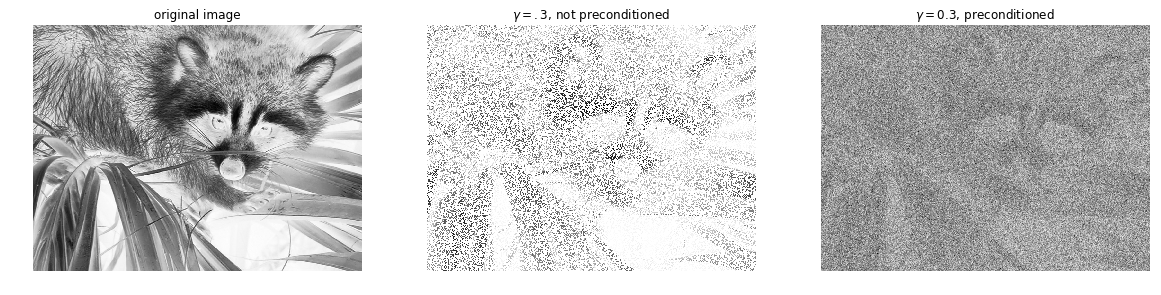

In [28]:
f, (ax0, ax1, ax2) = plt.subplots(figsize=(20,62),ncols=3)
title = ['original image', r'$\gamma = .3$, not preconditioned', r'$\gamma = 0.3$, preconditioned']
axeslist = [ax0,ax1,ax2]
for i in range(3):
    ax = axeslist[i]
    ax.set_title(title[i])
    ax.imshow(faces[i].reshape(fR,fC),cmap='Greys')
    ax.axis('off')
plt.show()

First let's import a small sample dataset `/examples/sample_mnist.h5py`. This is a subset of the [mnist dataset](http://yann.lecun.com/exdb/mnist/), consisting of images of hand-drawn integers. In this case, we only have images of 0's, 3's, and 9's. The training set has 1500 images (500 of each integer), and the test set has 300 images (100 of each integer). Each image has been flattened into a vector of length 784, so that the training data are stored as 1500 by 784 array, and the test data as a 300 by 784 array. The labels are loaded as 1D arrays.

# KMeans clustering

In [19]:
from sparseklearn import load_mnist_dataset
np.random.seed(27)
X_train, y_train, X_test, y_test = load_mnist_dataset()

First let's just fit the training data with all the default options. The only parameters we need to specify are the compression factor (gamma) and the number of clusters. Here's what the means look like for the given training data.

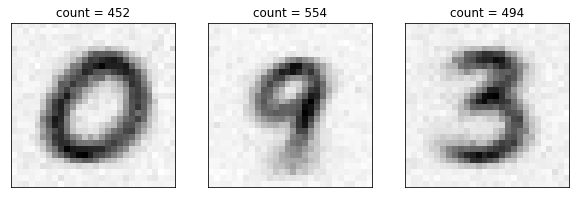

In [20]:
from sparseklearn import KMeans
kmc = KMeans(gamma = 0.1, n_clusters = 3)
kmc.fit(X_train)

plot_mnist_means(kmc)

They look a lot cleaner if we use the two-pass algorithm instead of the one-pass. The two-pass algorithm reconstructs the means from the dense training data.

In [ ]:
kmc = KMeans(gamma = .1, n_clusters = 3, n_passes = 2)
kmc.fit(X_train)
plot_mnist_means(kmc)

In [ ]:
kmc = KMeans(gamma = 12, alpha = 3, n_init = 50, n_clusters = 3, n_passes = 2)
kmc.fit(X_train)
plot_mnist_means(kmc)